In [3]:
import numpy as np

In [16]:
data_ibl = np.load("20240204_1426.npy")
time_ibl = data_ibl[:, 0]
omegaX_ibl = data_ibl[:, 1]
omegaY_ibl = data_ibl[:, 2] * (-1)
omegaZ_ibl = data_ibl[:, 3]

In [23]:
data_1 = np.load("05022024_1.npy")
time_1 = data_1[:, 0]
fi_1 = data_1[:, 1]
theta_1 = data_1[:, 2]
omega_1 = theta_1*3600

In [22]:
data_2 = np.load("05022024_2.npy")
time_2 = data_2[:, 0]
fi_2 = data_2[:, 1]
theta_2 = data_2[:, 2]
omega_2 = theta_2*3600

In [7]:
import matplotlib.pyplot as plt

### Сразу обработаем time_ibl от переполнения

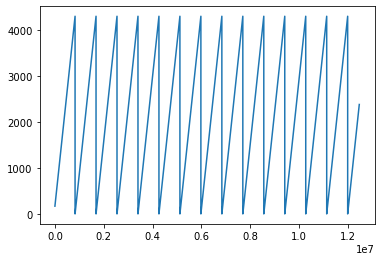

In [17]:
plt.plot([i for i in range(len(time_ibl))], time_ibl)

In [18]:
time_corr = time_ibl
n = 0
delta = 0
for i in range(len(time_corr)-1):
    if abs(time_corr[i+1]-time_corr[i])>2000:
        n += 1
        time_corr[(i+1):] += (time_corr[i] - delta)
        delta += (time_corr[i] - delta)
print(n, " раз переполнилось время на ибл")
print("Примерное время измерения - ", n*4295)
print(time_corr[len(time_corr)-1])

14  раз переполнилось время на ибл
Примерное время измерения -  60130
62507.408700000015


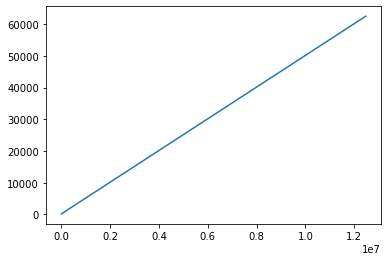

In [19]:
plt.plot([i for i in range(len(time_corr))], time_corr)

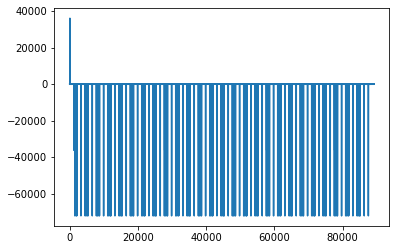

In [20]:
plt.plot(time_1, omega_1)

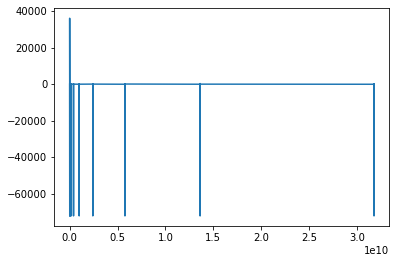

In [21]:

plt.plot(time_ibl, omegaY_ibl)

In [22]:
def cut_peaks(data, n):
    counter = 0
    in_peak = False

    for i in range(len(data)):
        if abs(data[i]) > 1000 and not in_peak:
            in_peak = True
            counter += 1
        elif in_peak and abs(data[i]) < 200:
            in_peak = False
            if counter == n:
                break
    print(data[i-20])
    if counter < n:
        print("Only ", counter, " peaks in data")
        return data
    else:
        return data[:i+1]

In [23]:
dataibl = cut_peaks(omegaY_ibl, 10)
timeibl = time_ibl[:len(dataibl)]

-3781.94157206


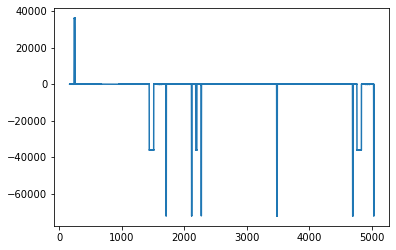

In [24]:
plt.figure()
plt.plot(timeibl, dataibl)
plt.show()

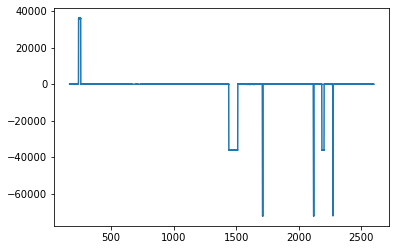

In [25]:
plt.figure()
plt.plot(timeibl[:len(dataibl)//2], dataibl[:len(dataibl)//2])
plt.show()

и как это понимать??? почему оно различается? ПОТОМУ ЧТО ПЕРЕПОЛНЯЕТСЯ ВРЕМЯ!!!

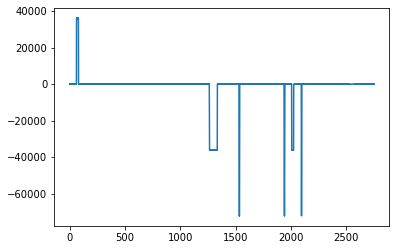

In [17]:
plt.figure()
plt.plot(time_1[:25000], omega_1[:25000])
plt.show()

In [30]:
def find_points(omega1, omega2, n_peaks, limit):
    counter = 0
    in_peak = False
    same_time = []
    index2 = 0 

    for i in range(len(omega1)):
        if abs(omega1[i]) > limit and not in_peak:
            in_peak = True
            counter += 1
            for j in range(index2, len(omega2), 1):
                if abs(omega2[j]) > limit:
                    same_time.append((i,j))
                    index2 = j
                    break
            
        elif in_peak and abs(omega1[i]) < limit:
            in_peak = False
            for j in range(index2, len(omega2), 1):
                if abs(omega2[j]) < limit:
                    same_time.append((i,j))
                    index2 = j
                    break
            if counter == n_peaks:
                break
    if counter < n_peaks:
        print("Only ", counter, " peaks in data")
    else:
        return same_time

In [27]:
points = find_points(omegaY_ibl, omega_1, 10, 500)
print(points, len(points))

[(14066, 556), (17861, 728), (254314, 11466), (268908, 12129), (308015, 13906), (309310, 13966), (389468, 17604), (390763, 17663), (403119, 18225), (406913, 18396), (420620, 19019), (421465, 19057), (661868, 29984), (664063, 30084), (904517, 41008), (906261, 41087), (918569, 41647), (933163, 42309), (972068, 44078), (973363, 44137)] 20


In [28]:
for i in range(len(points)):
    print(omegaY_ibl[points[i][0]], omega_1[points[i][1]])

539.7804193 3028.464
348.91362315 -35.352000000000004
-645.1723771 -3765.9960000000005
-465.84323294 -31.680000000000003
-540.78843943 -1127.52
-402.10454609 -9.216000000000001
-584.40927132 -1866.24
-379.93597371 53.136
-624.61389733 -3859.5600000000004
-482.84352796 0.36000000000000004
-611.604827 -1009.548
-342.74291861 -5.364
-584.99185547 -1330.3799999999999
-325.12289266 -20.628
-697.53986773 -3935.988
-413.32261362 -21.384
-649.96515123 -3078.936
-483.07110933 5.94
-574.02993953 -1518.084
-362.15537263 23.616


238.655 14066
257.63 17861
1439.895 254314
1512.865 268908
1708.4 308015
1714.875 309310
2115.665 389468
2122.14 390763
2183.92 403119
2202.89 406913
2271.425 420620
2275.65 421465
3477.665 661868
3488.64 664063
4690.9077 904517
4699.6277 906261
4761.1677 918569
4834.1377 933163
5028.6627 972068
5035.1377 973363


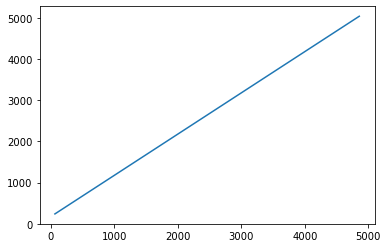

In [29]:
timeibl = []
time1 = []
for i in range(len(points)):
    #print(time_ibl[points[i][0]], time_1[points[i][1]])
    timeibl.append(time_ibl[points[i][0]])
    time1.append(time_1[points[i][1]])
    #print(time_1[points[i][1]], points[i][1])
    print(time_ibl[points[i][0]], points[i][0])
    
plt.figure()
plt.plot(time1, timeibl)
plt.show()

переполнение у времени блока оси timeibl после времени 4294.9650, это надо как-то отслеживать

In [15]:
for i in range(len(timeibl)-1):
    if abs(timeibl[i+1]-timeibl[i])>2000:
        for j in range(i+1, len(timeibl), 1):
            timeibl[j] += 4294.9650
        break

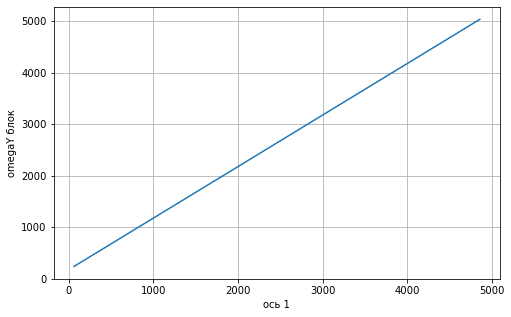

In [30]:
plt.figure(figsize=(8, 5))
plt.plot(time1, timeibl)
plt.grid(True)
plt.xlabel('ocь 1')
plt.ylabel('omegaY блок')
plt.show()

In [31]:
a, b = np.polyfit(time1, timeibl, 1)
print(f"timeibl = {a}*time1 + {b}")

timeibl = 0.999987391242748*time1 + 177.60520982538085


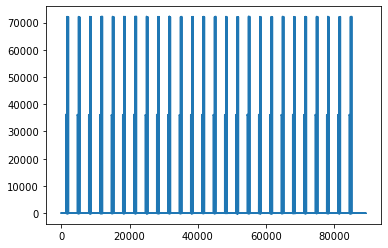

In [32]:
plt.plot(time_2, omega_2)

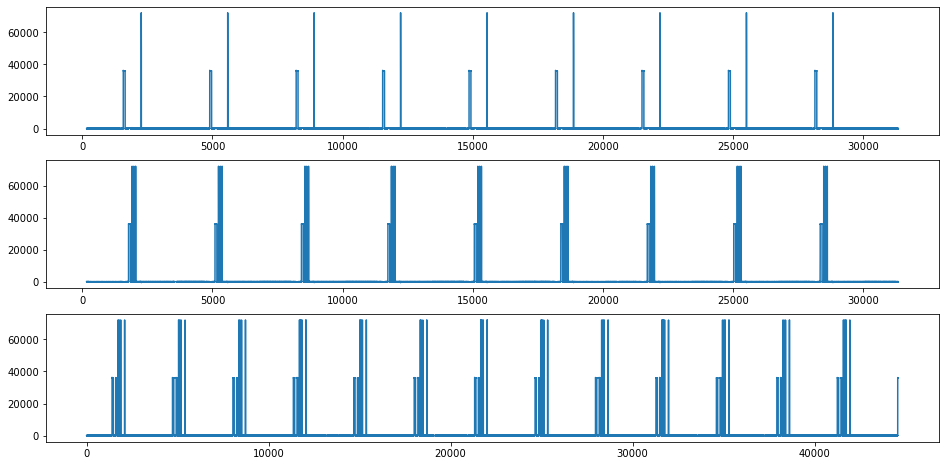

In [33]:
fig, axs = plt.subplots(3, figsize=(16, 8))
axs[0].plot(time_ibl[:len(time_ibl)//2], omegaX_ibl[:len(time_ibl)//2])
axs[1].plot(time_ibl[:len(time_ibl)//2], omegaZ_ibl[:len(time_ibl)//2])
axs[2].plot(time_2[:len(time_2)//2], omega_2[:len(time_2)//2])

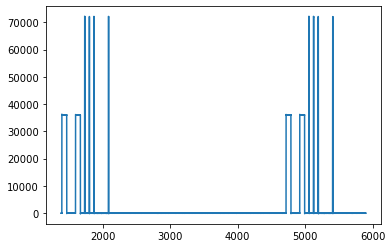

In [11]:
plt.plot(time_2[12600:53550], omega_2[12600:53550])

1574.17 1394.866662 281169 12673
1647.105 1467.726831 295756 13334
2263.19 1597.332712 418973 14512
2269.625 1670.283469 420260 15174
4894.4327 1731.626327 945222 15731
4967.3677 1738.082984 959809 15790
5583.447700000001 1799.834939 1083025 16352
5589.8827 1806.287067 1084312 16410
8213.6927 1868.055245 1609074 16972
8286.627700000001 1874.493237 1623661 17030
8902.7081 2083.855053 1746878 18932
8909.1481 2090.298457 1748166 18990
11534.9431 4715.149251 2273325 42835
11607.8831 4788.111161 2287913 43499
12222.9631 4917.661297 2410929 44676
12229.3981 4990.600552 2412216 45339
14853.201200000001 5051.855512 2936977 45895
14926.1362 5058.305775 2951564 45953
15543.221200000002 5120.099242 3074981 46514
15549.656200000001 5126.551166 3076268 46573


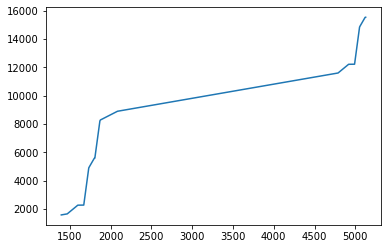

In [35]:
timeibl2 = []
time2 = []
for i in range(len(points2)):
    timeibl2.append(time_ibl[points2[i][0]])
    time2.append(time_2[points2[i][1]])
    print(time_ibl[points2[i][0]], time_2[points2[i][1]], points2[i][0], points2[i][1])
    
plt.figure()
plt.plot(time2, timeibl2)
plt.show()

Нужно еще по z сравнивать

In [59]:
def find_points(omegaX, omegaZ, omega2, n_peaks, limit):
    counter = 0
    in_peak = False
    same_time = []
    index1 = 0 
    indexX = 0
    indexZ = 0

    for i in range(len(omega2)):
        if abs(omega2[i]) > limit and not in_peak:
            in_peak = True
            counter += 1
            for j in range(index1, len(omegaX), 1):
                if abs(omegaX[j]) > limit:
                    indexX = j
                    break
            for k in range(index1, len(omegaZ), 1):
                if abs(omegaZ[k]) > limit:
                    indexZ = k
                    break
            same_time.append((i, min(indexX, indexZ)))
            index1 = min(indexX, indexZ)
            
        elif in_peak and abs(omega2[i]) < limit:
            in_peak = False
            if indexX < indexZ:
                for j in range(index1, len(omegaX), 1):
                    if abs(omegaX[j]) < limit:
                        same_time.append((i,j))
                        index1 = j
                        break
            if indexX > indexZ:
                for k in range(index1, len(omegaZ), 1):
                    if abs(omegaZ[k]) < limit:
                        same_time.append((i,k))
                        index1 = k
                        break
            if counter == n_peaks:
                break
                
    if counter < n_peaks:
        print("Only ", counter, " peaks in data")
    else:
        return same_time

In [64]:
points2 = find_points(omegaX_ibl, omegaZ_ibl, omega_2, 10, 600) #limit больше 500, потому что у икса неортогональности от z

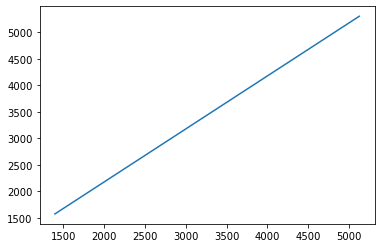

In [63]:
timeibl2 = []
time2 = []
for i in range(len(points2)):
    timeibl2.append(time_ibl[points2[i][1]])
    time2.append(time_2[points2[i][0]])
    
plt.figure()
plt.plot(time2, timeibl2)
plt.xlabel()
plt.show()